In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot

### White noise

In [4]:
np.random.seed(100)

In [5]:
noise=np.random.normal(0,1,5000)

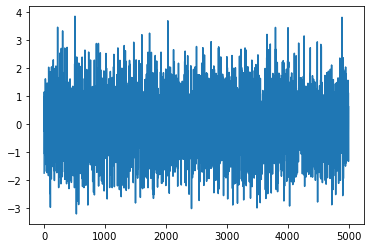

In [6]:
plt.plot(noise);

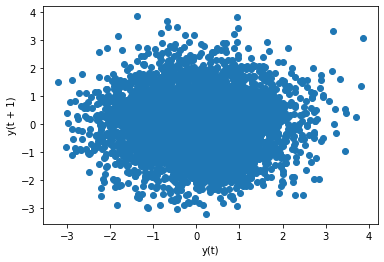

In [7]:
lag_plot(pd.DataFrame(noise));

(-0.05, 0.15)

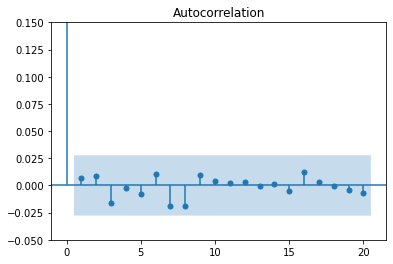

In [8]:
fig=plot_acf(noise,lags=20,zero=True)
plt.ylim([-0.05,0.15])

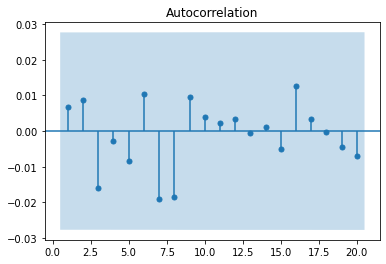

In [9]:
fig=plot_acf(noise,lags=20,zero=False)

#### All displayed coefficients (apart from the one for zero lag) are within the confidence interval. We expect that there are no correlations.

In [10]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, kpss

#### The null hypothesis for the Ljung-Box test is that the first k autocorrelation coefficients are not statistically different from zero (no correlations)

In [11]:
acorr_ljungbox(noise,lags=[20],return_df=True) # k=20 in this example

,lb_stat,lb_pvalue
20,8.336363,0.989398


In [12]:
acorr_ljungbox(noise,lags=20,return_df=True) # show the result of the test for all k up to 20

,lb_stat,lb_pvalue
1,0.229938,0.631569
2,0.623022,0.732340
3,1.907348,0.591858
4,1.946470,0.745604
5,2.290745,0.807625
6,2.845835,0.827933
7,4.660490,0.701315
8,6.384800,0.604212
9,6.846002,0.653149
10,6.925453,0.732463


### How do we test for stationarity?

#### Augmented Dickey-Fuller test|

In [13]:
adfuller(noise) # null hypothesis time series is non-stationary

(-70.23025939421295,
 0.0,
 0,
 4999,
 {'1%': -3.431658793968827,
  '5%': -2.862118345383404,
  '10%': -2.567077853953267},
 14281.458777106282)

#### p value is very low we have to reject  the null hypothesis

#### Kwiatkowski-Phillips-Schmidt-Shin test

In [14]:
kpss(noise) # null hypothesis time series is stationary

/Users/mirek/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.07767083532759042,
 0.1,
 32,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

#### p value is greater than 0.05 - the hypothesis stands

### Random walk

In [15]:
walk=[0]


In [16]:
for i in range(len(noise)):
    walk.append(walk[-1] + noise[i])

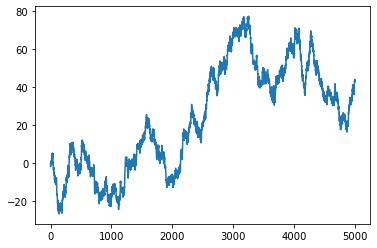

In [17]:
plt.plot(walk);

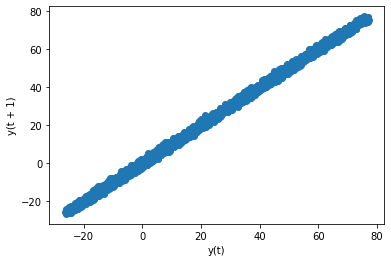

In [18]:
lag_plot(pd.DataFrame(walk));

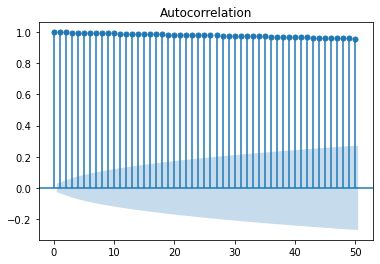

In [19]:
fig=plot_acf(walk,lags=50)

#### Please note that all corelation coefficients are outside the confidence interval.

In [20]:
acorr_ljungbox(walk,lags=[20],return_df=True)

,lb_stat,lb_pvalue
20,98631.463889,0.0


#### Ljung-Box test corroborates the existence of correlations.

In [21]:
adfuller(walk)

(-1.3446405969248876,
 0.6085099698691658,
 0,
 5000,
 {'1%': -3.431658532075464, '5%': -2.8621182296803203, '10%': -2.56707779236},
 14282.414424011165)

In [22]:
kpss(walk,nlags=20)

/Users/mirek/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(16.67854878432449,
 0.01,
 20,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

#### Both  adf and kpss indicate that random walk is non-stationary.

### Random walk with drift

In [23]:
drift_walk=[0]
drift=0.02

In [24]:
for i in range(len(noise)):
    drift_walk.append(drift_walk[-1] +drift+ noise[i])

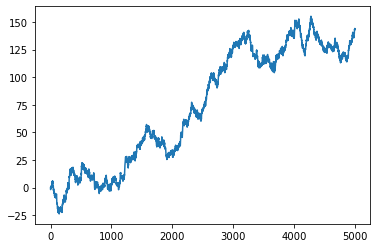

In [25]:
plt.plot(drift_walk);

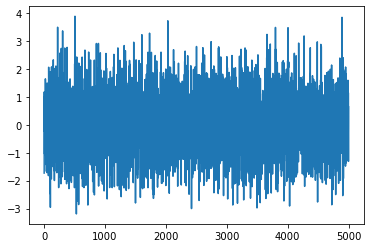

In [26]:
plt.plot(pd.DataFrame(drift_walk).diff());

#### After differencing we recover noise used to generate both walks. Differencing is the simplest invertible method for reducing or eliminating time series non-stationarity.